In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
data=pd.read_excel(r"C:\Users\S\Desktop\ML L3PP\linear_regreesion\salary_data.xlsx")

In [169]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [171]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [172]:
data.YearsExperience.values

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

Text(0, 0.5, 'Salary')

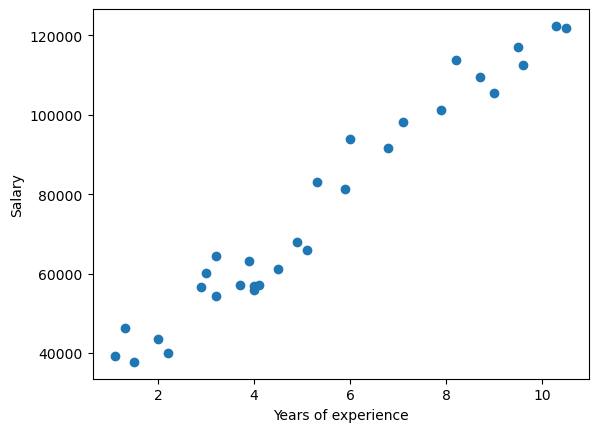

In [173]:
plt.scatter(data.YearsExperience,data.Salary)
plt.xlabel("Years of experience")
plt.ylabel("Salary")

In [174]:
#This gives 1-D results
x=data.iloc[:,0]
x.head()
x.shape

(30,)

In [175]:
#This gives 1-D results
y=data.loc[:,"Salary"]
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [176]:
#This gives 2-D results 
x=data.iloc[:,0:1]
x.head()
x.shape

(30, 1)

In [177]:
#This gives 2-D results
y=data.iloc[:,1:2]
y.head()
y.shape

(30, 1)

In [178]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
slr=LinearRegression()
slr.fit(x,y)

LinearRegression()

In [181]:
slr.coef_

array([[9449.96232146]])

In [182]:
slr.intercept_

array([25792.20019867])

In [183]:
pred_experience=int(input("Enter years of experience: "))
slr.predict([[pred_experience]])

c:\Users\S\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[73042.01180594]])

In [184]:
slr.score(x,y)*100

95.69566641435085

[[ 36187.15875227]
 [ 47527.11353802]
 [ 68317.03064522]
 [ 90051.94398456]
 [109896.86485962]
 [129741.78573467]]


c:\Users\S\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


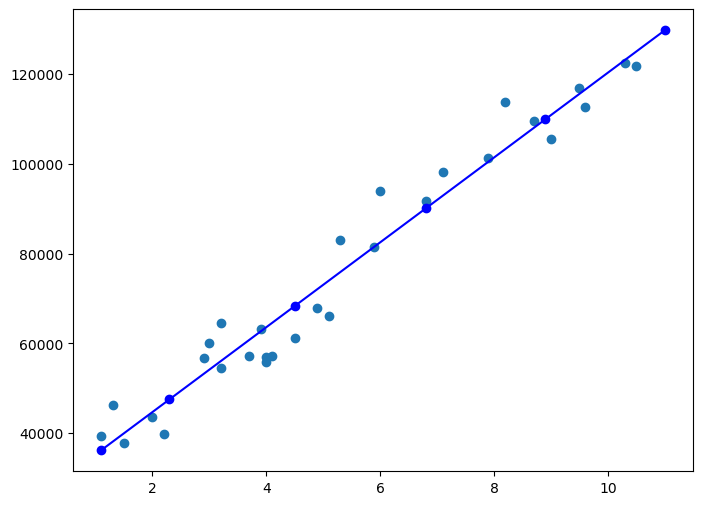

In [185]:
#Matplotlib takes numpy-array, lists and dictionary as an input
fig=plt.figure(figsize=[8,6])
years_of_experience=data.YearsExperience.values
salary=data.Salary.values
new_years_of_experience=[[1.1],[2.3],[4.5],[6.8],[8.9],[11]]
pred_salary=slr.predict(new_years_of_experience)
print(pred_salary)
plt.scatter(years_of_experience,salary)
plt.plot(new_years_of_experience,pred_salary,c="blue",marker="o")

In [186]:
#np.random.rand() =[0,1] range
#np.random.randn()= samples a normal disrtribution with mean=0  and variance=1
#np.random.randint(2)= generates a s=random integer in the range eg[0,2]

In [195]:
def gradient_descent(x,y,learning_rate=0.01,epoch=2000,c_current=0):
    n_samples=len(x)         #len(x)
    m_current=np.random.randn()
    gd_df=pd.DataFrame(columns=["coef_gradient",'intercept_gradient','current_coef', 'current_intercept', 'cost_value'])
    for i in range(epoch):
        y_pred=m_current*x + c_current
        cost_value=1/n_samples * np.sum([val ** 2 for val in (y-y_pred)])
        
        # gradient formula for coefficient
        # cost_value = 1/n_samples * sum((true_value - y_predicted)^2)
        # cost_value = 1/n_samples * sum((true_value - (mx+c))^2)
        # dcost/dm = 2/n_samples * (true_value - mx - c) (0 - x - 0)
        # dcost/dm = -2/n_sampples * (true_value - predicted_value)(x) 

        # gradient formula for intercept
        # cost_value = 1/n_samples * sum((true_value - predicted_value)^2)
        # cost_value = 1/n_samples * sum((true_value - (mx+c))^2)
        # cost_value = -2/n_samples * sum(true_value - predicted_value) (1)
        
        m_gradient=-2/n_samples *np.sum(x*(y-y_pred))
        c_gradient=-2/n_samples *np.sum(y-y_pred)
        m_current=m_current- learning_rate*m_gradient
        c_current=c_current- learning_rate*c_gradient
        gd_df.loc[i]=[m_gradient,c_gradient,m_current,c_current,cost_value]
    return gd_df
        
        

In [196]:
X=data.iloc[:,0:1].values
Y=data.iloc[:,1:2].values
model_df=gradient_descent(X,Y)
model_df.tail(10)

,coef_gradient,intercept_gradient,current_coef,current_intercept,cost_value
1990,0.324816,-2.188851,9450.726875,25787.048075,3.127096e+07
1991,0.323442,-2.179591,9450.723641,25787.069871,3.127096e+07
1992,0.322074,-2.170371,9450.720420,25787.091574,3.127096e+07
1993,0.320711,-2.161189,9450.717213,25787.113186,3.127096e+07
1994,0.319355,-2.152046,9450.714019,25787.134707,3.127096e+07
1995,0.318004,-2.142942,9450.710839,25787.156136,3.127096e+07
1996,0.316658,-2.133876,9450.707673,25787.177475,3.127096e+07
1997,0.315319,-2.124849,9450.704519,25787.198723,3.127096e+07
1998,0.313985,-2.115860,9450.701380,25787.219882,3.127096e+07
1999,0.312656,-2.106909,9450.698253,25787.240951,3.127096e+07


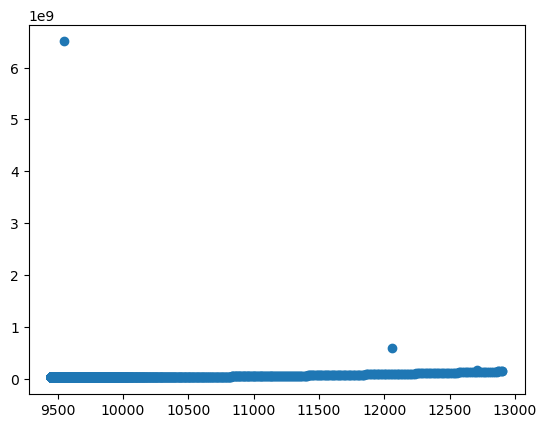

In [197]:
plt.scatter(model_df.current_coef,model_df.cost_value)

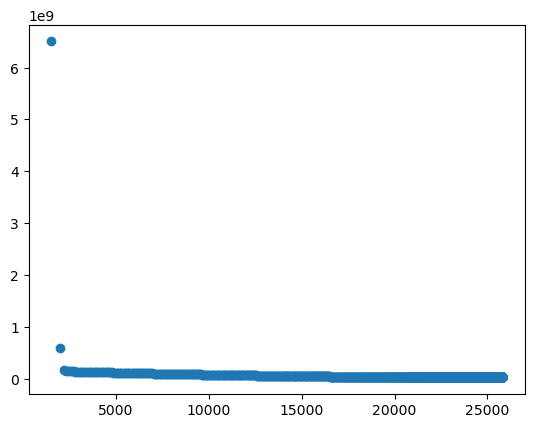

In [198]:
plt.scatter(model_df.current_intercept,model_df.cost_value)